In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sys
sys.path.append('..')
import mglearn

### 5.3. Evaluation Metrics and Scoring
- 기존의 Simple한 모델 평가 지표 (score)
  - 분류 문제: 정확도 (Accuracy)
  - 회귀 문제: $R^2$
- 하지만, 어플리케이션에 따라 위의 평가 지표가 적합하지 않을 수 있음. 

#### 5.3.1 Keep the End Goal in Mind (최종 목표를 기억하라)
- 어플리케이션의 고차원 목표인 비지니스 지표를 우선적으로 고려해야 함
  - 비지니스 지표 예
    - 교통사고율 낮춤
    - 입원환자 수 낮춤
    - 웹사이트 사용자 유입률 증대
    - 소비자 소비률 증대
  - 분석 모델 개발 초기 단계에 매개변수를 조정하기 위해 시험 삼아 모델을 실제 운영 시스템에 곧바로 적용하기란 위험부담이 크다.
- 비지니스 임팩트 (Business Impact)
  - 어떤 머신러닝 어플리케이션에서 특정 알고리즘을 선택하여 나타난 결과
- 훈련 모델에 대한 비지니스 임팩트를 정확하게 예상할 수 있는 다양한 평가지표 도입 필요
  - 이진 분류의 평가 지표
  - 다중 분류의 평가 지표
  - 회귀의 평가 지표

#### 5.3.2 Metrics for Binary Classification
- 두 가지 분류 클래스
  - 양성 클래스 (주 관심 클래스) --> Positive Class
  - 음성 클래스 --> Negative Class <br/><br/>
  
- 모델 적용 결과에 대한 분류
  - True Positive (참 양성, TP)
    - 모델에서 실제 양성 클래스를 정확하게 양성으로 평가한 것들
  - False Negative (거짓 음성, FN)
    - 모델에서 실제 양성 클래스를 잘못하여 음성으로 평가한 것들    
  - True Negative (참 음성, TN)
    - 모델에서 실제 음성 클래스를 정확하게 음성으로 평가한 것들          
  - False Positive (거짓 양성, FP)
    - 모델에서 실제 음성 클래스를 잘못하여 양성으로 평가한 것들 

- 참고: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative

<img src="images/eval.png" width="75%"/>

##### Kinds of errors
- 암의 조기 발견 어플리케이션 
  - 테스트가 음성(-)이면 건강함을 뜻함
    - 음성 클래스(Negative Class)
  - 테스트가 양성(+)이면 암 진단이 되었음을 뜻함
    - 양성 클래스(Positive Class)
  - 잘못된 분류 케이스
    - Case 1. 건강한 사람을 양성으로 잘못 분류한 경우
      - 이 환자에게 비용 손실과 불편함을 초래함
      - 즉, 잘못된 양성 예측
      - 분류: ***거짓 양성 (False Positive)***
    - Case 2. 암에 걸린 사람을 음성으로 잘못 분류한 경우
      - 제대로 된 검사나 치료를 제때에 못하게 하는 치명적인 오류
      - 즉, 잘못된 음성 예측
      - 분류: ***거짓 음성 (False Negative)***
      
- 대부분의 경우 ***거짓 음성***이 ***거짓 양성***보다 더 치명적
- 거짓 음성 분류와 거짓 양성 분류 중 하나가 다른 것 보다 훨씬 많을 때 이 상황은 매우 중요한 상황으로 인식해야 함.

##### Imbalanced datasets
- 불균형 데이터셋(Imbalanced datasets)
  - 예) 인터넷 광고 클릭 데이터에서 원본 데이터 샘플의 99%가 '클릭 아님'이고 1%만이 '클릭'인 데이터셋
  - 현실에서 불균형 데이터는 매우 많음
  - 위 예에서 머신러닝 모델을 만들지 않고서도 무조건 '클릭 아님'으로 예측하면 그 정확도가 99%가 됨.
  
- 따라서, '정확도'만으로 모델의 성능을 판별하는 것은 지양해야 함.

- digits 데이터셋에서 Target 데이터를 숫자 9이면 True, 그렇지 않으면 False로 변환하여 1:9의 불균형 데이터셋 생성

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test[:10])
print()
print(len(np.where(y_test == True)[0]))
print(len(np.where(y_test == False)[0]))

(1347, 64)
(1347,)
(450, 64)
(450,)
[False False False False False False False  True False False]

47
403


- 정답 '9임'의 총 개수: 47 --> ***양성 클래스***
- 정답 '9가 아님'의 총 개수: 403 --> ***음성 클래스***

- DummyClassifier
  - strategy='stratified'
    - 기본값
    - 레이블 비율에 맞추어서 예측
  - strategy='most_frequent'    
    - 가장 많은 레이블로 항상 예측

- DummyRegressor
  - strategy='mean'
  - strategy='median'  

- 아무런 학습을 하지 않고도 90% 정확도가 나올 수 있음

In [4]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


- 정상적인 학습을 하더라도 92% 정확도가 나옴 --> 위의 결과와 그리 차이가 없음

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


- 레이블 비율에 맞추어서 예측을 하는 Dummy 모델도 꽤 성능이 좋음.

In [6]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_dummy)))
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

Unique predicted labels: [False  True]
dummy score: 0.84
logreg score: 0.98


- Dummy 분류기 조차 매우 좋은 예측 정확도를 산출하는 점에 유의
  - 현실세계에서 많이 발생할 수 있는 불균형 데이터셋(Imbalanced datasets)과 함께 **오로지 정확도만으로 모델의 성능을 지표화하는 것은 올바른 방법이 아님**

##### Confusion matrices
- **오차 행렬(Confusion Matrix)**
  - 이진 분류 평가 결과를 나타낼 때 가장 널리 사용되는 방식
  - 행(Row)
    - 정답 클래스
  - 열(Colume)
    - 예측 클래스

In [7]:
from sklearn.metrics import confusion_matrix

print(len(np.where(y_test == True)[0]))
print(len(np.where(y_test == False)[0]))

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

47
403
Confusion matrix:
[[401   2]
 [  8  39]]


- [***음성*** 정답] - 정답 '9가 아님'의 총 개수: 403
  - [***음성*** 예측] - 예측 '9가 아님'의 총 개수: 401 --> ***True Negative (TN)***
  - [***양성*** 예측] - 예측 '9임'의 총 개수: 2 --> ***False Positive (FP, 거짓 양성)*** --> 잘못된 양성 분류
  
- [***양성*** 정답] - 정답 '9임'의 총 개수: 47
  - [***음성*** 예측] - 예측 '9가 아님'의 총 개수: 8 --> ***False Negative (FN, 거짓 음성)*** --> 잘못된 음성 분류
  - [***양성*** 예측] - 예측 '9임'의 총 개수: 39 --> ***True Positive (TP)***



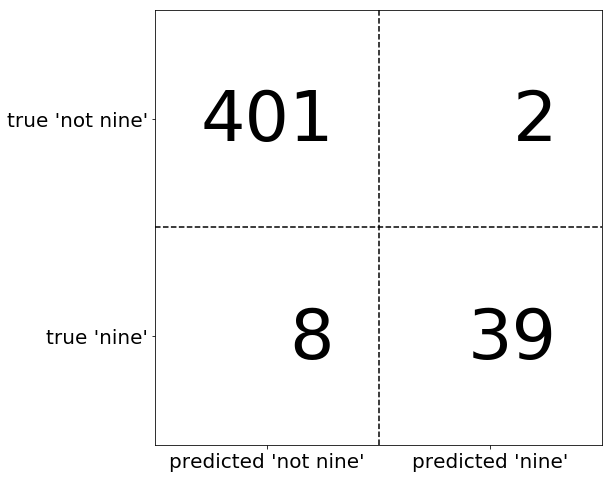

In [8]:
mglearn.plots.plot_confusion_matrix_illustration()

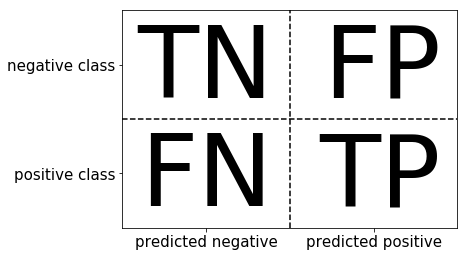

In [9]:
mglearn.plots.plot_binary_confusion_matrix()

In [10]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))

print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))

print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))

print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[353  50]
 [ 45   2]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


###### Accuracy (정확도)
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

- 전체 샘플 수 중에서 정확히 예측한 것(TP 와 TN)의 비율
- scikit-learn 에서 score 함수가 반환하는 값

##### Precision (정밀도)
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

- 양성(Positive)로 예측한 것(TP와 FP)들 중 진짜 양성인 것(TP)의 비율
- **거짓 양성(FP)의 수를 줄이는 것을 목표**로 할 때 사용하는 지표
  - 신약의 효과 검증 등 임상 시험에 많이 사용
- **거짓 음성(FN)의 수가 늘어나는 것에 대해 정밀도 수치는 영향받지 않음**
- 양성 예측도 (PPV)라고도 불리움

##### Recall (재현율)
\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

- 진짜 양성인 것(FN과 TP)들 중 올바르게 양성으로 예측된 것(TP)의 비율 
- **거짓 음성(FN)의 수를 줄이는 것**을 목표로 할 때 사용하는 지표
  - 암 진단
- **거짓 양성(FP)의 수가 늘어나는 것에 대해 재현율 수치는 영향받지 않음***
  - 즉, 건강한 사람이 일부 암 진단을 받더라도 암에 걸린 사람을 빠짐없이 찾는 것이 더 중요
- 민감도(Sensitivity), 적중률(Hit Rate), 진짜 양성 비율 (TPR)라고도 불리움

##### f-score (f-점수)
- $P$: Precision
- $R$: Recall
\begin{equation}
\text{F} = \frac{1}{\displaystyle \alpha \frac{1}{P} + (1-\alpha) \frac{1}{R}}
\end{equation}
- 정밀도와 재현율은 상충 관계
- 모든 샘플을 양성 클래스로만 예측한 경우
  - FP와 TP만 존재
  - 재현율: 1, 정밀도는 상대적으로 낮아짐
- 하나의 샘플만 (올바르게) 양성 클래스로 예측하고 나머지 샘플을 음성 클래스로만 예측한 경우
  - TN과 FN만 존재
  - 정밀도: 1, 재현율은 상대적으로 낮아짐
- f-score
  - 정밀도와 재현율의 조화 평균
  - 정밀도와 재현울을 동시에 고려한 수치이므로 불균한 이진 분류문제의 정확도(Accuracy)보다 더 나은 지표 
  - f1-score
    - f-score 공식에서 $\alpha=0.5$
\begin{equation}
\text{f1-score} = \frac{1}{\displaystyle 0.5 \frac{1}{P} + 0.5 \frac{1}{R}} = 2 \cdot \frac{P \cdot R}{P + R}
\end{equation}
- f-measure (f-측정)이라고도 함

#### [Note] 주가 변동 이진 분류 예측
- 특성 데이터
  - 일봉의 종가 기반
  - N개 종목의 과거 M일치의 종가 데이터
  - 1개 샘플의 특성 데이터 크기 N * M
  - 하루씩 Shift하면서 새로운 샘플 생성
- 타겟 데이터
  - 특정 종목의 M+1일의 종가 데이터
  - 직전 M일자 종가보다 M+1일자 종가가 올랐다면 1, 그렇지 않으면 0
- 두 가지 분류 클래스
  - 1: 양성 (Positive) 클래스
  - 0: 음성 (Negative) 클래스 
- 성능 평가 측정
  - Accuracy는 당연히 높아야 함.
  - Precision과 Recall은 상충관계이므로 둘 중 하나를 택하여 더 집중적으로 높여야 한다면 어떤것을 높여야 하나?
    - Precision 관점
      - 거짓 양성(FP)을 줄이는 것을 목적
      - 즉, 주가가 올라간다고 예측을 했는 데, 실제로는 하락을 한 경우를 줄이고자 함.
      - **재화의 상실**
    - Recall 관점
      - 거짓 음성(FN)을 줄이는 것을 목적
      - 즉, 주가가 하락한다고 예측을 했는 데, 실제로는 상승을 한 경우를 줄이고자 함.
      - **기회의 상실**

In [11]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.04
f1 score tree: 0.55
f1 score logistic regression: 0.89


C:\Users\JS-Jeong\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- f1 score most frequent 모델의 f1 점수는 TP가 0이므로, 재현율과 정밀도가 모두 0
  - 그러므로 f1 점수 공식에서 분모가 0
  - 위 Warning 메시지의 원인 
- f1-점수로 비교해본 가장 좋은 모델
  - Logistic Regression

- sklearn.metrics.classification_report
  - 각 클래스마다 교대로 양성임을 가정
  - 상위 두 개의 출력 라인
    - 해당 클래스가 양성일 때 다음 4개의 값을 출력
      - 정밀도(precision)
      - 재현율(recall)
      - f1-점수(f1-score)
      - 해당 클래스에 실제로 속한 샘플 개수(support) 
          - 정답 데이터인 y_test에 대한 각 클래스별 샘플 개수

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



C:\Users\JS-Jeong\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.89      0.88      0.88       403
       nine       0.04      0.04      0.04        47

avg / total       0.80      0.79      0.79       450



In [14]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



##### Taking uncertainty into account
- 모델 예측의 확신도를 가늠하기 위한 함수
  - decicion_function
    - 임계값: 0
    - decision_fuction의 임계값이 0일 때 클래스 분류  
      - decision_function() <= 0 --> 클래스 0 (음성 클래스)로 분류
      - decision_function() > 0 --> 클래스 1 (양성 클래스)로 분류
  - predict_proba
    - 임계값: 0.5

In [16]:
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(
    n_samples=(400, 50),  # 음성 클래스: 400개, 양성 클래스: 50개
    centers=2, 
    cluster_std=[7.0, 2], 
    random_state=22
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

svc = SVC(gamma=.05).fit(X_train, y_train)

(337, 2)
(337,)

(113, 2)
(113,)


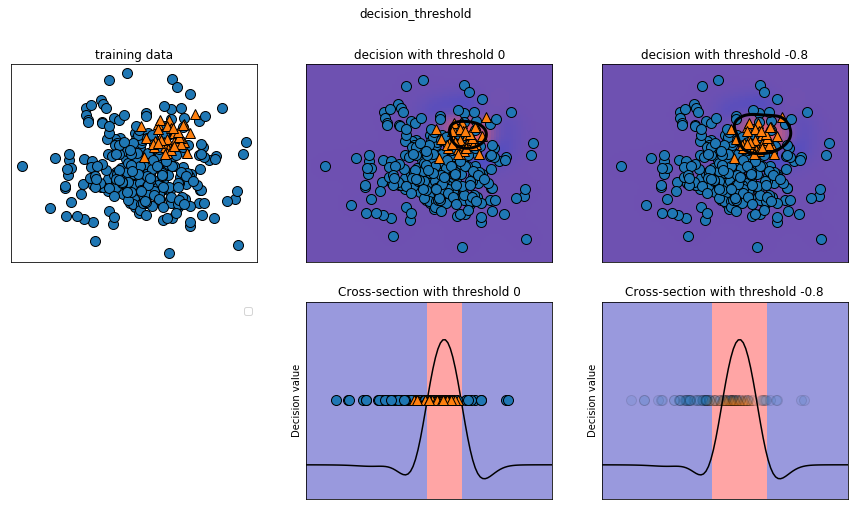

In [17]:
mglearn.plots.plot_decision_threshold()

- 위 상위 두 개의 그림에서 검은색 동그라미
  - decision_fuction의 임계점이 0일 때와 -0.8일 때의 경계 위치
  - 이 동그라미 내부는 양성 클래스(decision_function() > 0)로 분류, 바깥쪽은 음성 클래스로 분류

In [18]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



- 양성 클래스 1에 대해 정밀도(0.35)가 매우 낮음, 재현율(0.67)도 낮음.
  - 음성 클래스 0에 대한 샘플 수가 많아서 생긴 결과임 --> 데이터 불균형

- 이제 클래스 1의 재현율(recall)을 높이는 것이 중요하다고 가정.
  - 즉, 거짓 양성(FP)의 수가 늘어나도 중요하지 않음.
  - 진짜 양성(TP)을 늘리고 거짓 음성(FN)을 줄이려고 함.
  - decision_function의 임계값을 낮추면 클래스 1로 분류되는 경우가 더 많아짐

In [19]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(y_pred_lower_threshold.shape)

(113,)


In [20]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



- 클래스 1의 재현율이 1.00 --> 즉, 거짓 음성은 전혀 없음
  - 반면에 정밀도는 다소 낮아짐
- decision_function 값의 임계점을 고르는 일반적인 방법을 제시하기는 어려움

##### Precision-Recall curves (정밀도-재현율 곡선)

- 분류 임계값 조정 작업
  - 정밀도와 재현율의 상충 관계 조정하는 일과 동일
  - 임계값 조정은 비지니스 목표에 의존적
    - 비지니스 목표: 어떤 클래스에 대해 목표로 하는 재현율 또는 정밀도 값을 얻어냄
    - 예를 들어 양성 클래스에 대하여 **90% 재현율 산출**이 비지니스 목표가 될 수 있음

- ***운영 포인트 (Operating Point)*** 지정
  - 예: **90% 재현율 산출**
  - 분류 모델이 목표로 하는 성능지표를 지정하는 작업
  - 비지니스 목표와 연관이 깊음
  - 많은 경우 운영 포인트를 정확하게 지정하는 것은 어려움
    - 이런 경우 임계값을 폭넓게 변경해 가며 정밀도와 재현율을 산출하며 그 장단점을 살펴보는 작업 필요
    - 이를 위해 ***정밀도-재현율 곡선***을 사용
    - sklearn.metrics.precision_recall_curve
      - 가능한 모든 임계값에 대한 정밀도와 재현율 값을 리스트로 반환

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

print("precision: {}\n".format(precision))
print("recall: {}\n".format(recall))
print("thresholds: {}\n".format(thresholds))

close_zero = np.argmin(np.abs(thresholds))
print(close_zero)
print(thresholds[close_zero])

precision: [0.32142857 0.2962963  0.30769231 0.32       0.33333333 0.34782609
 0.36363636 0.38095238 0.4        0.36842105 0.33333333 0.35294118
 0.375      0.4        0.42857143 0.38461538 0.41666667 0.45454545
 0.4        0.44444444 0.5        0.57142857 0.66666667 0.6
 0.5        0.66666667 0.5        1.         1.        ]

recall: [1.         0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
 0.88888889 0.88888889 0.88888889 0.77777778 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.55555556 0.55555556 0.55555556
 0.44444444 0.44444444 0.44444444 0.44444444 0.44444444 0.33333333
 0.22222222 0.22222222 0.11111111 0.11111111 0.        ]

thresholds: [-0.7512563  -0.58749402 -0.48739733 -0.44364565 -0.40435353 -0.28965335
 -0.24173165 -0.19257469 -0.17852475 -0.16644845 -0.1601932   0.08620484
  0.14630375  0.19153373  0.36988055  0.52008479  0.5230006   0.53195462
  0.63212214  0.74430046  0.87212596  0.88002558  0.88395198  0.97789353
  1.00010384  1.07030762  1.0843

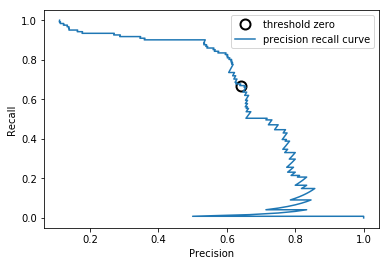

In [22]:
# create a similar dataset as before, but with more samples
# to get a smoother curve
X, y = make_blobs(
    n_samples=(4000, 500), 
    centers=2, 
    cluster_std=[7.0, 2],
    random_state=22
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(
    precision[close_zero],
    recall[close_zero],
    'o',
    markersize=10,
    label="threshold zero",
    fillstyle="none",
    c='k',
    mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

- 위그림의 파란색 곡선은 decision_function의 가능한 모든 임계값에 대응되는 Precision과 Recall 값을 나타냄
- 검은색 원은 decision_function의 기본 임계값인 0의 지점을 나타냄
  - 이 지점은 predict 메소드를 호출할 때 사용되는 임계 지점 값
- 위 정밀도-재현율 곡선은 오른쪽 위로 갈 수록 좋은 분류기
  - 오른쪽 위 --> 정밀도와 재현율이 모두 높은 곳
- 위 그래프에서 알 수 있는 것
  - 0.9 정도의 높은 Recall을 유지하면서도 0.5 정도의 Precision을 얻을 수 있음
  - 0.5보다 더 높은 Precision을 얻어내기 위해서는 Recall을 많이 손해 봐야 함

- RandomForestClassifier는 decision_function은 제공하지 않고 predict_proba만 제공
  - rf.predict_proba(X_test)[:, 1]
    - 양성 클래스(클래스 1)의 확신 정도값을 가지고 오는 코드
    - 기본 임계값: 0.5

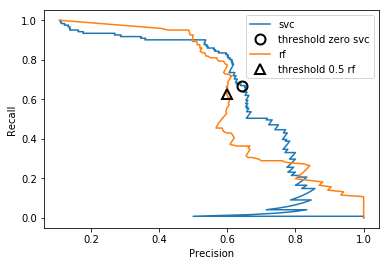

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(
    precision[close_zero], 
    recall[close_zero], 
    'o', 
    markersize=10,
    label="threshold zero svc", 
    fillstyle="none", 
    c='k', 
    mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(
    precision_rf[close_default_rf], 
    recall_rf[close_default_rf], 
    '^', 
    markersize=10,
    label="threshold 0.5 rf", 
    fillstyle="none", 
    c='k',
    mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

- 높은 Precision 또는 높은 Recall을 얻기 위해서는 RandomForestClassifier가 더 좋은 모델
- Precision 과 Recall 두 개의 값을 적절히 동시에 높은 값을 얻기 위해서는 SVC가 더 좋은 모델

- f1-score만으로는 이런 세세한 부분을 비교할 수 없음
  - f1-score는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수임

In [24]:
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


- 어느 모델이 좋은지 보다 정확하게 비교하려면... 
  - 특정 임계값이나 운영 포인트에 국한하지 않고 전체 곡선에 대한 정보를 요약해야 함
- ***Average Precision (평균 정밀도)***
  - 정밀도-재현율 곡선의 아랫부분 면적을 계산한 값
  - 항상 0(가장 나쁨)에서 1(가장 좋음)사이의 값을 지님
  - sklearn.metrics.average_precision_score

In [25]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


- 평균 정밀도 측면에서 RandomForestClassifier와 SVC가 큰 차이 없음

##### Receiver Operating Characteristics (ROC) and AUC
- 진짜 양성 비율 (TPR): 전체 양성 샘플(TP와 FN)중에서 진짜 양성(TP)로 올바로 분류된 비율 = 재현율
\begin{equation}
\text{TPR} = Recall = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
<br/>
<br/>
- 거짓 양성 비율 (FPR): 전체 음성 샘플(FP와 TN) 중에서 거짓 양성(FP)로 잘못 분류된 비율 
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}
<br/>
<br/>
- TPR과 FPR의 해석
  - TPR과 FPR은 서로 반비례적인 관계에 있다. 암환자를 진단할 때, 성급한 의사는 아주 조금의 징후만 보여도 암인 것 같다고 할 것이다. 이 경우 TPR은 1에 가까워질 것이다. 그러나 FPR은 반대로 매우 낮아져버린다. (정상인 사람도 다 암이라고 하니까)

  - 반대로 돌팔이 의사라서 암환자를 알아내지 못한다면, 모든 환자에 대해 암이 아니라고 할 것이다. 이 경우 TPR은 매우 낮아져 0에 가까워 질 것이다. 그러나 반대로 FPR은 급격히 높아져 1에 가까워질 것이다.(암환자라는 진단 자체를 안하므로, 암환자라고 잘못 진단 하는 경우가 없음)
  - 출처: http://newsight.tistory.com/53 [New Sight]
<br/>
<br/>

- ROC 곡선
  - ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
  - '수신기 운영 특성 (Receiver Operating Characteristics)'이라는 이름은 신호 탐지 이론에서 비롯
  - 이름 그 자체의 의미는 무시하고 'TPR-FPR 곡선'으로 이해하는 것이 좋음

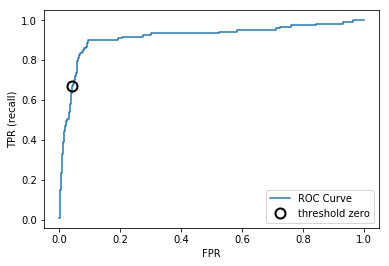

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

- ROC 곡선 해석
  - ROC 곡선은 왼쪽 상단에 가까울 수록 이상적임.
    - 즉, FPR은 낮게 유지하면서 TPR(재현율)은 높은 뷴류기가 좋음.  
  - 위 그림에서 기본 임계값 0에 대한 FPR과 TPR값보다는 FPR을 조금 더 늘려주면(0.1 정도) TPR을 상당히 높일 수 있음(0.9 정도)
    - 이러한 FPR=0.1 & TPR=0.9을 산출할 수 있는 임계값이 적절한 **운영 포인트**가 될 수 있음

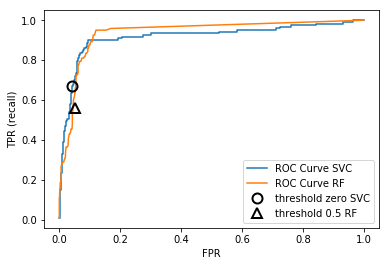

In [27]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

- 두 개의 ROC 곡선 해석
  - RandomForest 모델이 SVC 보다 좀 더 왼쪽 상단으로 ROC 곡선이 위치하는 듯 함
  - 어떤 ROC 곡선이 더 좋은지 알아보기 ROC 곡선아래의 면적을 하나의 값으로 요약할 수 있음
    - AUC (Area Under the (ROC) Curve)
      - 0(최악) ~ 1(최선)
    - 수집한 데이터가 불균현한 데이터 집합이라면 정확도보다 AUC가 더 의미있는 지표
    - sklearn.metrics.roc_auc_score

In [28]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


- AUC 측면에서 RandomForest 모델이 SVC 보다 좀 더 좋다고 볼 수 있음

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


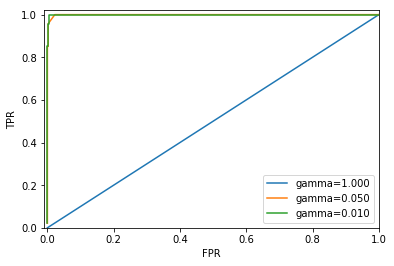

In [29]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))

    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

#### Multi-class classification
- 다중클래스 분류문제에서 불균형 데이터에 대해서 Accuracy(정확도) 지표는 좋은 지표가 되지 못함.
  - 훈련 샘플 비율
    - A 클래스: 85%
    - B 클래스: 10%
    - C 클래스: 5%
  - 실제 새로운 데이터도 위와 같은 비율로 출현한다고 하면 아무런 학습이 안된 모델 (Dummy Model)도 85% 정확도를 산출할 수 있음.

In [30]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

print("Shape of Test data: {}".format(y_test.shape))
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print()
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Shape of Test data: (450,)
Accuracy: 0.953

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


- 다중 클래스 예측 결과에 대한 confusion matrix 
  - 행: 정답 레이블
  - 열: 예측 레이블
- 위 confusion matrix에서 레이블 0에 대한 해석
$
\begin{bmatrix}
    TN & FP \\
    FN & TP
\end{bmatrix}
=
\begin{bmatrix}
    413 & 0 \\
    0 & 37
\end{bmatrix}
$
  - 클래스 0에 대해서는 거짓 음성(FN)이 없음
    - 첫번째 행(예측 레이블 행)에서 다른 항목들이 모두 0
  - 클래스 0에 대해서는 거짓 양성(FP)이 없음
    - 첫번째 열(정답 레이블 열)에서 다른 항목들이 모두 0
  - Accuracy = 1.0
  - Precision = 1.0
  - Recall = 1.0
  - F1-score = 1.0
<br/>
- 위 confusion matrix에서 레이블 1에 대한 해석    $
\begin{bmatrix}
    TN & FP \\
    FN & TP
\end{bmatrix}
=
\begin{bmatrix}
    402 & 5 \\
    4 & 39
\end{bmatrix}
$
  - 클래스 1에 대해서는 거짓 음성(FN)이 4건
  - 클래스 1에 대해서는 거짓 양성(FP)이 5건
  - Accuracy = (402+39)/450 = 0.98
  - Precision = 39/(39+5) = 0.89
  - Recall = 39/(4+39) = 0.91
  - F1-score = 2 x 0.89 x 0.91 / (0.89 + 0.91) = 0.90


- 위 confusion matrix에서 레이블 7에 대한 해석    $
\begin{bmatrix}
    TN & FP \\
    FN & TP
\end{bmatrix}
=
\begin{bmatrix}
    402 & 0 \\
    3 & 45
\end{bmatrix}
$
  - 클래스 7에 대해서는 거짓 음성(FN)이 3건
  - 클래스 7에 대해서는 거짓 양성(FP)이 0건
  - Accuracy = (402+45)/450 = 0.99
  - Precision = 45/45 = 1.0
  - Recall = 45/(3+45) = 0.94
  - F1-score = 2 x 1.0 x 0.94 / (1.0 + 0.94) = 0.97

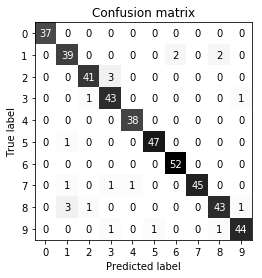

In [31]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")

plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [32]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



- 관심있는 클래스를 양성, 그 외의 모든 클래스는 음성으로 두고 precision, recall, f1-score 계산

- [NOTE] 다중 분류에서 불균형 데이터셋을 위해 가장 많이 사용되는 지표는 f1-score
- 클래스별로 f1-score를 산출한 이후, 전체 클래스에 대한 평균 f1-score 산출 전략 (다중 클래스일 때 반드시 아래 세 개의 항목 중 하나를 average 파라미터 값으로 제시해야 함)
  - macro 평균
    - 클래스별 f1-score에 가중치를 고려하지 않음
  - weighted 평균 (보통은 이것을 선택)
    - 클래스별 테스트 데이터 샘플 수로 가중치를 두어 f1-score 계산 (classification_report에 노출되는 값)
  - micro 평균
    - 모든 클래스별로 FP, FN, TP의 총 수를 헤아린 다음 산출

In [33]:
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

print("Weighted average f1 score: {:.3f}".format(f1_score(y_test, pred, average="weighted")))

print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))

Macro average f1 score: 0.954
Weighted average f1 score: 0.953
Micro average f1 score: 0.953


#### Regression metrics
- [note]: http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
<br/><br/>
- **Explained variance score**
![...](http://scikit-learn.org/stable/_images/math/494cda4d8d05a44aa9aa20de549468e4d121e04c.png)

  - $\hat{y}$: the estimated target output
  - $y$: the corresponding (correct) target output
  - $Var$: Variance

- **Mean absolute error**
![...](http://scikit-learn.org/stable/_images/math/c38d771fb5eb121916c06cf8c651363583d17794.png)

  - $\hat{y}_i$: the predicted value of the $i$-th sample 
  - $y_i$: the corresponding (correct) target output
  - $n_{samples}$: the number of target samples

- **Mean squared error**
![...](http://scikit-learn.org/stable/_images/math/44f36557fef9b30b077b21550490a1b9a0ade154.png)

  - $\hat{y}_i$: the predicted value of the $i$-th sample 
  - $y_i$: the corresponding (correct) target output
  - $n_{samples}$: the number of target samples

- **Mean squared logarithmic error**
![...](http://scikit-learn.org/stable/_images/math/7ab9dd9a29d207d773d08e4d1a0fc370f9b1fa35.png)
  - This metric is best to use when targets having exponential growth, such as population counts, average sales of a commodity over a span of years etc.
  - $\hat{y}_i$: the predicted value of the $i$-th sample 
  - $y_i$: the corresponding (correct) target output
  - $n_{samples}$: the number of target samples

- **Median absolute error**
![...](http://scikit-learn.org/stable/_images/math/9252f9de0d8c2043cf34a26e6f2643a6e66540b9.png)
  - It is particularly interesting because it is robust to outliers.
  - The loss is calculated by taking the median of all absolute differences between the target and the prediction.
  - $\hat{y}_i$: the predicted value of the $i$-th sample 
  - $y_i$: the corresponding (correct) target output

- **$R^2$ score (the coefficient of determination)**
![...](http://scikit-learn.org/stable/_images/math/bdab7d608c772b3e382e2822a73ef557c80fbca2.png)
  - where 
![...](http://scikit-learn.org/stable/_images/math/4b4e8ee0c1363ed7f781ed3a12073cfd169e3f79.png)
  - It provides a measure of how well future samples are likely to be predicted by the model.
  - $\hat{y}_i$: the predicted value of the $i$-th sample 
  - $y_i$: the corresponding (correct) target output

In [34]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

y_test = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

print("explained_variance_score:", explained_variance_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("mean_squared_log_error:", mean_squared_log_error(y_test, y_pred))
print("median_absolute_error:", median_absolute_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

explained_variance_score: 0.9571734475374732
mean_absolute_error: 0.5
mean_squared_error: 0.375
mean_squared_log_error: 0.12803912255571967
median_absolute_error: 0.5
r2_score: 0.9486081370449679


- [NOTE]: 전형적인 교차검증을 활용한 Regression 모델 구성 및 성능 측정 

In [39]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.model_selection import GridSearchCV

X, y = mglearn.datasets.make_wave(n_samples=200)
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

print()

param_grid = {    
    'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
    'alpha': [0.1, 0.3, 0.5, 0.7, 0.9]
}

estimator = GradientBoostingRegressor()

grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

grid_search.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))
print("Best parameters:\n{}".format(grid_search.best_params_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

y_pred = gbr.predict(X_test)

print()

# Possible scoring
print("explained_variance_score:", explained_variance_score(y_test, y_pred))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
#print("mean_squared_log_error:", mean_squared_log_error(y_test, y_pred))
print("median_absolute_error:", median_absolute_error(y_test, y_pred))
print("r2_score:", r2_score(y_test, y_pred))

X shape: (200, 1)
y shape: (200,)
X_train shape: (150, 1)
X_test shape: (50, 1)

Best cross-validation accuracy: 0.67
Best parameters:
{'alpha': 0.1, 'learning_rate': 0.1}
Best estimator:
GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Test set score: 0.62


TypeError: predict() missing 1 required positional argument: 'X'

### Using evaluation metrics in model selection
- [note]: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

- 이진 분류

In [40]:
from sklearn.model_selection import cross_val_score

# default scoring for classification is accuracy
scores = cross_val_score(SVC(), digits.data, digits.target == 9)
print("Default scoring: {}".format(scores))

# providing scoring="accuracy" doesn't change the results
scores2 = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(scores2))

print()

# 곡선의 면적을 활용한 성능 측정 (Recommended)
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="roc_auc")
print("ROC_AUC scoring: {}".format(roc_auc))

average_precision = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="average_precision")
print("Average Precision scoring: {}".format(average_precision))

print()

# 다양한 성능 측정 (Not Recommended)
precision = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="precision_weighted")
print("Precision scoring: {}".format(precision))

recall = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="recall_weighted")
print("Precision scoring: {}".format(recall))

f1_score = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="f1_weighted")
print("F1_score scoring: {}".format(f1_score))

Default scoring: [0.89983306 0.89983306 0.89983306]
Explicit accuracy scoring: [0.89983306 0.89983306 0.89983306]

ROC_AUC scoring: [0.99372294 0.98957947 0.99594929]
Average Precision scoring: [0.95991892 0.95348603 0.97765719]

Precision scoring: [0.80969953 0.80969953 0.80969953]
Precision scoring: [0.89983306 0.89983306 0.89983306]
F1_score scoring: [0.85239019 0.85239019 0.85239019]


- 다중 분류

In [41]:
scores = cross_val_score(SVC(), digits.data, digits.target, scoring="accuracy")
print("Explicit accuracy scoring: {}".format(scores))

f1_weighted = cross_val_score(SVC(), digits.data, digits.target, scoring="f1_weighted")
print("F1_weighted scoring: {}".format(f1_weighted))

Explicit accuracy scoring: [0.39368771 0.41068447 0.45973154]
F1_weighted scoring: [0.43853936 0.4627956  0.5243751 ]


- GridSearchCV에 다양한 scoring 적용 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

print()

# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


In [43]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


### Summary and Outlook